# Analisando as proposições de 1998 - 2002

### Os dados utilizados se encontram no portal de dados abertos da Câmara dos Deputados como sendo referentes aos anos de 1998 até 2002.

#### Link do portal: https://dadosabertos.camara.leg.br/swagger/api.html

#### Foi feito o download do arquivo no formato json disponibilizado no site, o mesmo foi processado por um script feito em python responsável por realizar o parsing e gerar um outro arquivo no formato csv.

#### Carregamento dos dados:

In [29]:
import pandas as pd

data = pd.read_csv('proposicoes/proposicoes_1998_2002.csv', encoding = 'utf8', header = 0)

## Visão Geral

In [30]:
data.shape

(3473, 56)

#### O arquivo contém, portanto, 3473 linhas com proposições e 56 colunas para cada uma. Três primeiras linhas:

In [7]:
data.head(3)

,COD_ORGAO_ORIGEM,NUM_LEGISLATURA_APRESEN,NUM_LEGISLATURA_LEI,NOM_PARTIDO_POLITICO,DAT_VETO_TOTAL,NOM_UF,DES_TIPO_PROPOSICAO,DES_COMPLETA,COD_TIPO_NORMA_JURIDICA_ORIGEM,SIG_UF,...,COD_TIPO_AUTOR_ORIGEM,NUM_SESSAO_LEGISLATIVA_LEI,DAT_FIM_LEGISLATURA_APRESEN,SIG_PARTIDO_POLITICO,IND_ATIVO_TIPO_PROPOSICAO,DAT_INICIO_LEGISLATURA_APRESEN,NUM_PROPOSICAO,COD_TIPO_SESSAO_LEGISLATIVA_LEI,NOM_PARLAMENTAR,DAT_FINAL_RECESSO_APRESEN
0,-1,51,-1,PARTIDO DA FRENTE LIBERAL,NaN,SÃO PAULO,PROJETO DE LEI,PROJETO DE LEI,-1,SP,...,TipoParlamentar_10000,-1.0,31-01-2003,PFL,1,01-02-1999,7254.0,-1.0,NEUTON LIMA,01-08-2002
1,-1,51,-1,PARTIDO TRABALHISTA BRASILEIRO,NaN,SÃO PAULO,PROJETO DE LEI,PROJETO DE LEI,-1,SP,...,TipoParlamentar_10000,-1.0,31-01-2003,PTB,1,01-02-1999,7255.0,-1.0,RICARDO IZAR,01-08-2002
2,-1,51,-1,PARTIDO PROGRESSISTA BRASILEIRO,NaN,MATO GROSSO DO SUL,PROJETO DE LEI,PROJETO DE LEI,-1,MS,...,TipoParlamentar_10000,-1.0,31-01-2003,PPB,1,01-02-1999,7413.0,-1.0,PEDRO PEDROSSIAN,01-08-2002


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 56 columns):
COD_ORGAO_ORIGEM                         3473 non-null int64
NUM_LEGISLATURA_APRESEN                  3473 non-null int64
NUM_LEGISLATURA_LEI                      3473 non-null int64
NOM_PARTIDO_POLITICO                     1479 non-null object
DAT_VETO_TOTAL                           6 non-null object
NOM_UF                                   1488 non-null object
DES_TIPO_PROPOSICAO                      3473 non-null object
DES_COMPLETA                             3472 non-null object
COD_TIPO_NORMA_JURIDICA_ORIGEM           3473 non-null int64
SIG_UF                                   1488 non-null object
DAT_FIM_LEGISLATURA_LEI                  1790 non-null object
COD_PROPOSICAO_ORIGEM                    3471 non-null float64
DES_ATIVO_TIPO_PROPOSICAO                3473 non-null object
NOM_ORGAO                                1985 non-null object
DES_APELIDO_ORGAO              

In [9]:
data.isnull().any()

COD_ORGAO_ORIGEM                         False
NUM_LEGISLATURA_APRESEN                  False
NUM_LEGISLATURA_LEI                      False
NOM_PARTIDO_POLITICO                      True
DAT_VETO_TOTAL                            True
NOM_UF                                    True
DES_TIPO_PROPOSICAO                      False
DES_COMPLETA                              True
COD_TIPO_NORMA_JURIDICA_ORIGEM           False
SIG_UF                                    True
DAT_FIM_LEGISLATURA_LEI                   True
COD_PROPOSICAO_ORIGEM                     True
DES_ATIVO_TIPO_PROPOSICAO                False
NOM_ORGAO                                 True
DES_APELIDO_ORGAO                         True
DATAPRESENTACAOPROPOSICAO                False
DES_TIPO_AUTOR                           False
COD_SEXO                                  True
IND_ATIVO_ORGAO                          False
COD_TIPO_PARLAMENTAR                     False
DES_TIPO_NORMA_JURIDICA                   True
DES_TIPO_SESS

#### Das 56 totais, apenas 20 colunas estão completas, as outras possuem pelo menos uma linha sem informação.

### Veremos agora as relações entre as proposições e as informações de algumas colunas.

## Proposições x Estados

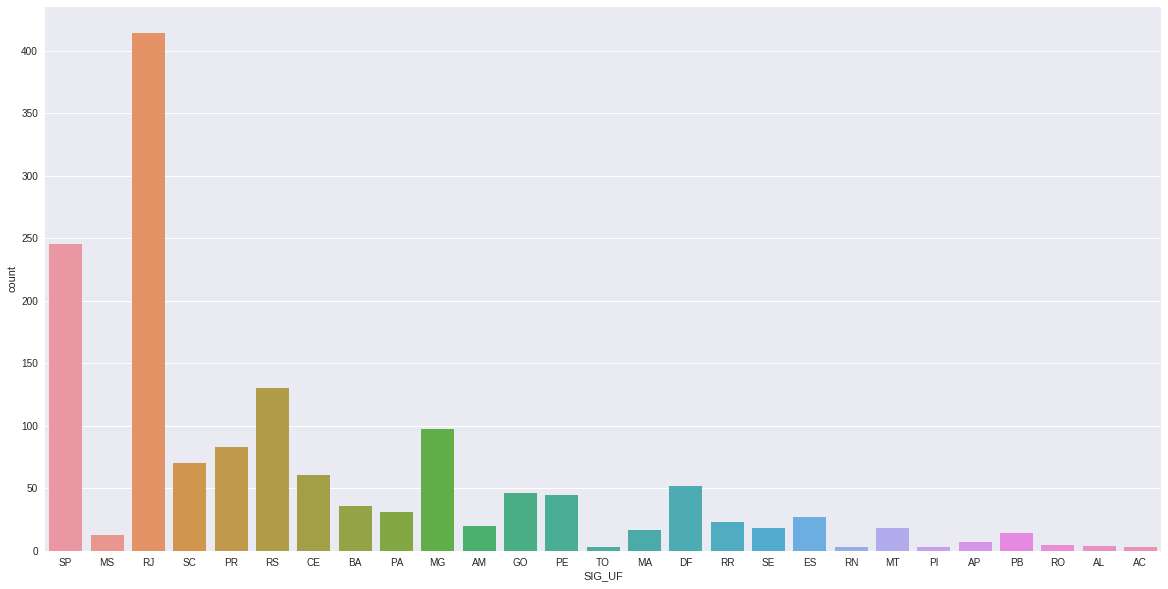

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['SIG_UF'], label = "Quantidade")

#### Ranking dos 6 estados com mais proposições e as respectivas quantidades.

In [11]:
uf_list = data['SIG_UF'].tolist()
uf_counter = {}

for word in uf_list:
    if word in uf_counter:
        uf_counter[word] += 1
    else:
        uf_counter[word] = 1
        
popular_uf = sorted(uf_counter, key = uf_counter.get, reverse = True)
top_6 = popular_uf[:7]

for uf in top_6:
    if type(uf)!= float:
        print(uf + ': ' + str(uf_counter[uf]) + ' proposições')
    else:
        print('Sem a informação do estado: ' + str(uf_counter[uf]) + ' proposições')

Sem a informação do estado: 1985 proposições
RJ: 414 proposições
SP: 245 proposições
RS: 130 proposições
MG: 97 proposições
PR: 83 proposições
SC: 70 proposições


#### Quantidade de proposições em cada estado:

In [12]:
uf_counter

{'SP': 245,
 'MS': 13,
 'RJ': 414,
 'SC': 70,
 'PR': 83,
 'RS': 130,
 'CE': 61,
 'BA': 36,
 'PA': 31,
 'MG': 97,
 'AM': 20,
 'GO': 46,
 'PE': 45,
 'TO': 3,
 'MA': 17,
 'DF': 52,
 'RR': 23,
 'SE': 18,
 'ES': 27,
 'RN': 3,
 'MT': 18,
 'PI': 3,
 'AP': 7,
 'PB': 14,
 'RO': 5,
 nan: 1985,
 'AL': 4,
 'AC': 3}

## Proposições x Gênero

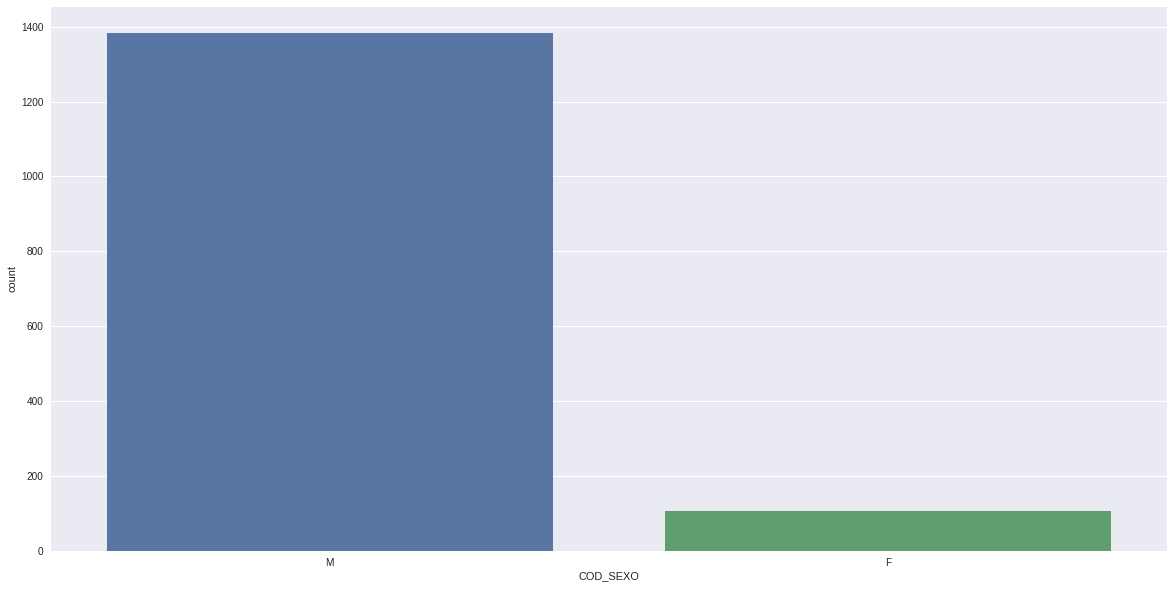

In [13]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['COD_SEXO'], label = "Quantidade")

In [14]:
gender_list = data['COD_SEXO'].tolist()
gender_counter = {}

for gender in gender_list:
    if gender in gender_counter:
        gender_counter[gender] += 1
    else:
        gender_counter[gender] = 1
        
gender_counter

{'M': 1383, 'F': 105, nan: 1985}

#### Grande maioria das proposições vieram de homens sendo que 1985 não informam o gênero da pessoa que propôs.

## Proposições x Temas

#### Ranking dos 6 temas mais frequentes:

In [15]:
theme_list = data['AREAS_TEMATICAS_APRESENTACAO'].tolist()
theme_counter = {}

for theme in theme_list:
    if theme in theme_counter:
        theme_counter[theme] += 1
    else:
        theme_counter[theme] = 1
        
popular_themes = sorted(theme_counter, key = theme_counter.get, reverse = True)
top_6 = popular_themes[:7]

for theme in top_6:
    print(theme + ': ' + str(theme_counter[theme]) + ' proposições')

COMUNICAÇÕES: 1643 proposições
TRABALHO E EMPREGO: 176 proposições
DIREITO PENAL E PROCESSUAL PENAL: 161 proposições
ADMINISTRAÇÃO PÚBLICA: 157 proposições
TRIBUTAÇÃO: 124 proposições
VIAÇÃO E TRANSPORTES: 109 proposições
EDUCAÇÃO: 94 proposições


#### Lista com todos os temas e a quantidade de proposições relacionadas a eles entre 1998 e 2002 se encontra em *temas98_02.txt* dentro do diretório *temas* neste mesmo repositório.

In [16]:
for theme in popular_themes:
    print(str(theme) + ': ' + str(theme_counter[theme]) + ' proposições')

COMUNICAÇÕES: 1643 proposições
TRABALHO E EMPREGO: 176 proposições
DIREITO PENAL E PROCESSUAL PENAL: 161 proposições
ADMINISTRAÇÃO PÚBLICA: 157 proposições
TRIBUTAÇÃO: 124 proposições
VIAÇÃO E TRANSPORTES: 109 proposições
EDUCAÇÃO: 94 proposições
SAÚDE: 81 proposições
SEGURANÇA PÚBLICA: 70 proposições
DIREITO CIVIL E PROCESSUAL CIVIL: 69 proposições
PREVIDÊNCIA E ASSISTÊNCIA SOCIAL: 67 proposições
ECONOMIA, ADMINISTRAÇÃO FINANCEIRA E ORÇAMENTÁRIA (UTILIZADO ATÉ A LEGISLATURA 53): 57 proposições
INDÚSTRIA, COMÉRCIO E DEFESA DO CONSUMIDOR (UTILIZADO ATÉ A LEGISLATURA 53): 48 proposições
DIREITOS HUMANOS, MINORIAS E CIDADANIA: 41 proposições
DESENVOLVIMENTO URBANO E TRÂNSITO: 39 proposições
ORGANIZAÇÃO POLÍTICO-ADMINISTRATIVA DO ESTADO (UTILIZADO ATÉ A LEGISLATURA 53): 36 proposições
POLÍTICA FUNDIÁRIA: 31 proposições
HOMENAGENS E DATAS COMEMORATIVAS: 30 proposições
ORGANIZAÇÃO ADMINISTRATIVA DO ESTADO: 23 proposições
PROCESSO LEGISLATIVO: 22 proposições
DEFESA E SEGURANÇA NACIONAL: 22 pr

## Proposições x Tipo do Autor

#### Ranking dos tipos de autores do mais frequente ao menos frequente:

In [17]:
author_type_list = data['DES_TIPO_AUTOR'].tolist()
author_type_counter = {}

for author_type in author_type_list:
    if author_type in author_type_counter:
        author_type_counter[author_type] += 1
    else:
        author_type_counter[author_type] = 1
        
popular_author_type = sorted(author_type_counter, key = author_type_counter.get, reverse = True)

for author_type in popular_author_type:
    if author_type_counter[author_type] != 1:
        print(author_type + ': ' + str(author_type_counter[author_type]) + ' proposições')
    else:
        print(author_type + ': ' + str(author_type_counter[author_type]) + ' proposição')

COMISSÃO PERMANENTE: 1666 proposições
DEPUTADO: 1488 proposições
ÓRGÃO DO PODER EXECUTIVO: 163 proposições
ÓRGÃO DO PODER LEGISLATIVO: 114 proposições
ÓRGÃO DO PODER JUDICIÁRIO: 13 proposições
COMISSÃO MISTA PERMANENTE: 9 proposições
COMISSÃO ESPECIAL: 7 proposições
MPU - MINISTÉRIO PÚBLICO DA UNIÃO: 5 proposições
COMISSÃO PARLAMENTAR DE INQUÉRITO: 4 proposições
COMISSÃO DIRETORA: 4 proposições


#### A grande maioria das proposições partem de comissões permanentes.

## Proposições x Ano

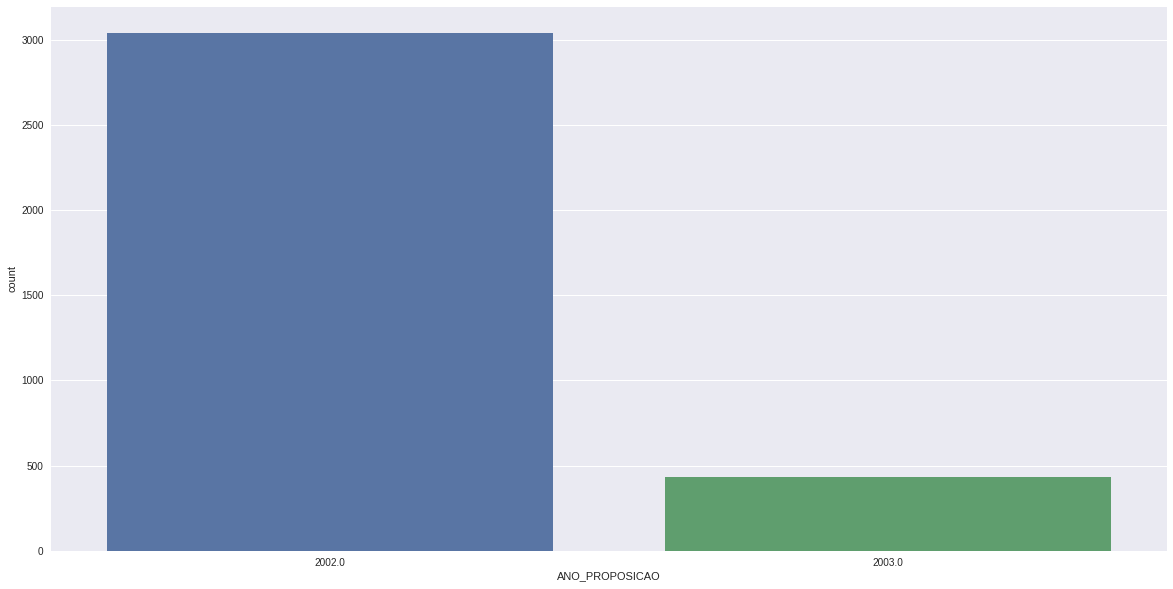

In [18]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['ANO_PROPOSICAO'], label = "Quantidade")

#### Ranking:

In [19]:
year_list = data['ANO_PROPOSICAO'].tolist()
year_counter = {}

for year in year_list:
    if year in year_counter:
        year_counter[year] += 1
    else:
        year_counter[year] = 1
        
popular_year = sorted(year_counter, key = year_counter.get, reverse = True)

for year in popular_year:
    if year_counter[year] != 1:
        print(str(year) + ': ' + str(year_counter[year]) + ' proposições')

2002.0: 3040 proposições
2003.0: 431 proposições


## Proposições x Região

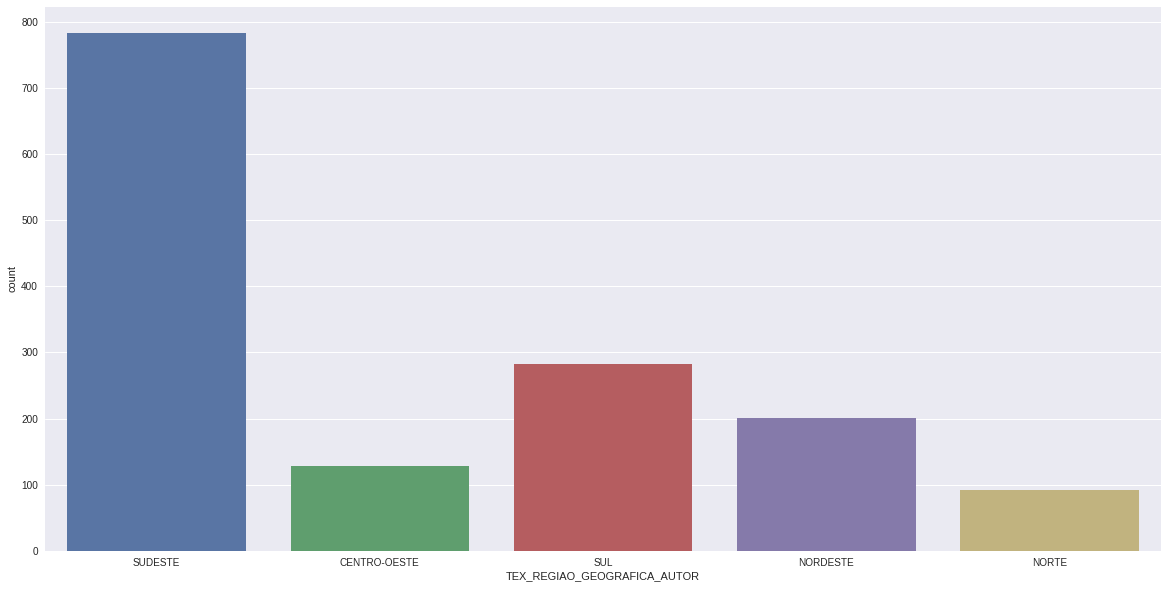

In [20]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['TEX_REGIAO_GEOGRAFICA_AUTOR'], label = "Quantidade")

#### Ranking:

In [21]:
region_list = data['TEX_REGIAO_GEOGRAFICA_AUTOR'].tolist()
region_counter = {}

for region in region_list:
    if region in region_counter:
        region_counter[region] += 1
    else:
        region_counter[region] = 1
        
popular_region = sorted(region_counter, key = region_counter.get, reverse = True)

for region in popular_region:
    if type(region) != float:
        print(region + ': ' + str(region_counter[region]) + ' proposições')
    else:
        print('Sem informação de região: ' + str(region_counter[region]) + ' proposições')

Sem informação de região: 1985 proposições
SUDESTE: 783 proposições
SUL: 283 proposições
NORDESTE: 201 proposições
CENTRO-OESTE: 129 proposições
NORTE: 92 proposições


## Proposições x Tipos

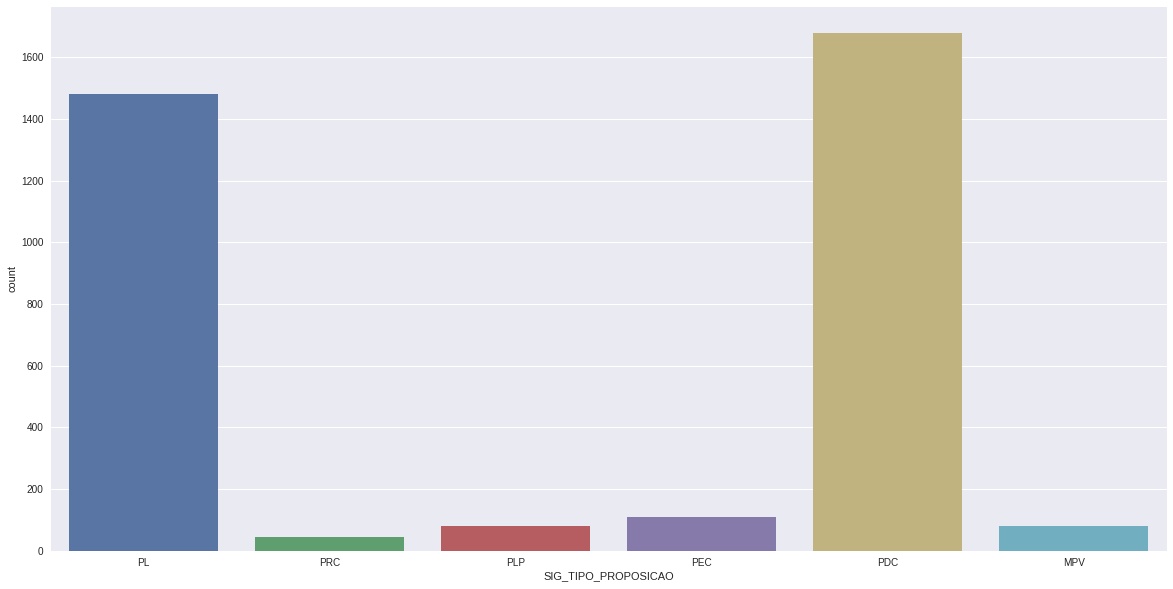

In [22]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['SIG_TIPO_PROPOSICAO'], label = "Quantidade")

#### Ranking:

In [23]:
proposition_list = data['SIG_TIPO_PROPOSICAO'].tolist()
proposition_counter = {}

for proposition in proposition_list:
    if proposition in proposition_counter:
        proposition_counter[proposition] += 1
    else:
        proposition_counter[proposition] = 1
        
popular_proposition = sorted(proposition_counter, key = proposition_counter.get, reverse = True)

for proposition in popular_proposition:
    print(proposition + ': ' + str(proposition_counter[proposition]) + ' proposições')

PDC: 1678 proposições
PL: 1480 proposições
PEC: 108 proposições
MPV: 82 proposições
PLP: 80 proposições
PRC: 45 proposições


#### Legenda: 

* PL = Projetos de Lei 
* PDC = Projetos de Decreto Legislativo da Câmara
* PLP = Projetos de Lei Complementar
* PEC = Projetos de Emenda à Constituição
* MPV = Medidas Provisórias (MPV)

## Proposições x Partidos Políticos

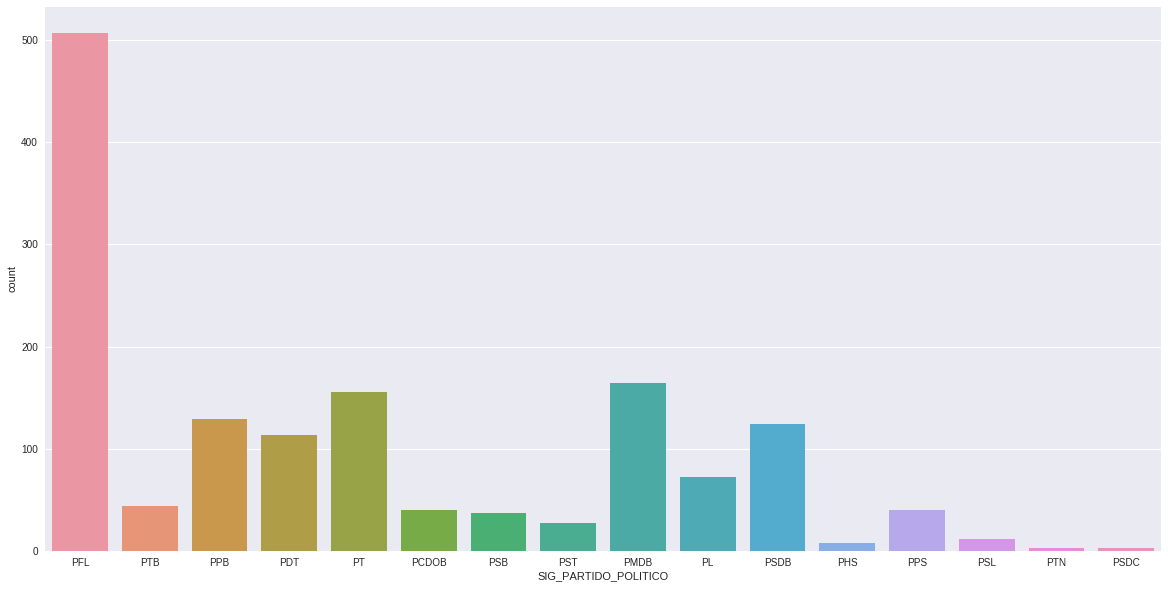

In [24]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['SIG_PARTIDO_POLITICO'], label = "Quantidade")

#### Ranking dos 6 partidos com mais proposições e as respectivas quantidades:

In [25]:
pp_list = data['SIG_PARTIDO_POLITICO'].tolist()
pp_counter = {}

for pp in pp_list:
    if pp in pp_counter:
        pp_counter[pp] += 1
    else:
        pp_counter[pp] = 1
        
popular_pp = sorted(pp_counter, key = pp_counter.get, reverse = True)
top_7 = popular_pp[:7]

for pp in top_7:
    if type(pp) != float:
        print(pp + ': ' + str(pp_counter[pp]) + ' proposições')
    else:
        print('Sem informação de partido: ' + str(pp_counter[pp]) + ' proposições')

Sem informação de partido: 1994 proposições
PFL: 507 proposições
PMDB: 164 proposições
PT: 156 proposições
PPB: 129 proposições
PSDB: 124 proposições
PDT: 113 proposições


#### Lista de todos os partidos e suas respectivas quantidades:

In [26]:
print(pp_counter)

{'PFL': 507, 'PTB': 44, 'PPB': 129, 'PDT': 113, 'PT': 156, 'PCDOB': 40, 'PSB': 37, 'PST': 27, 'PMDB': 164, 'PL': 72, 'PSDB': 124, 'PHS': 8, 'PPS': 40, nan: 1994, 'PSL': 12, 'PTN': 3, 'PSDC': 3}


## Proposições x Nome do Parlamentar

#### Ranking dos 10 deputados com mais proposições:

In [27]:
name_list = data['NOM_PARLAMENTAR'].tolist()
name_counter = {}

for name in name_list:
    if name in name_counter:
        name_counter[name] += 1
    else:
        name_counter[name] = 1
        
popular_name = sorted(name_counter, key = name_counter.get, reverse = True)
top_10 = popular_name[:11]

for name in top_10:
    if type(name) != float:
        print(name + ': ' + str(name_counter[name]) + ' proposições')
    else:
        print('Sem informação do nome do deputado: ' + str(name_counter[name]) + ' proposições')

Sem informação do nome do deputado: 1985 proposições
JOSÉ CARLOS COUTINHO: 327 proposições
ENI VOLTOLINI: 42 proposições
POMPEO DE MATTOS: 40 proposições
NAIR XAVIER LOBO: 29 proposições
CRESCÊNCIO PEREIRA JR.: 28 proposições
CABO JÚLIO: 25 proposições
ALBERTO FRAGA: 24 proposições
NEUTON LIMA: 18 proposições
LUIZ CARLOS HAULY: 17 proposições
JOÃO DADO: 15 proposições


#### Média de proposições por deputado:

In [28]:
counter = 0
for name in name_counter:
    counter = counter + name_counter[name]
    
print("Média de proposições por candidato: %.2f" % ((counter-1985)/(len(name_counter)-1)))  # 1985 proposições sem nome do deputado (nan)

Média de proposições por candidato: 4.82


#### Lista com todos os deputados e a quantidade de proposições feitas por cada um durante todos os anos de mandato se encontra no arquivo *deputados&qnt_proposicoes_1998_2002.txt* dentro do diretório *deputados&qnt_proposicoes* neste mesmo repositório.